In [ ]:
import pandas as pd
df = pd.read_csv('DG_out.csv')
df.head()

In [2]:
df.tail()

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
51058,0a672f8ad282d8576bea644edb692925c52499852d744f...,1,1,50.00,50.00,100.00,50.00000,50.000,0,0,0,0,0
51059,a9cabb50a1e983849034f317170b6262b08651bf8e169e...,0,1,0.00,50.00,50.00,0.00000,50.000,0,0,0,0,0
51060,f68d86e801aa68eb9aac1ba6292c4e3b8ca98560e7e0e6...,8,2,50.41,50.41,100.82,6.30125,25.205,0,0,0,0,0
51061,09571ef46c082af045f9447e597abc4b7dc4dce3e10f62...,1,2,88.77,88.77,177.54,88.77000,44.385,0,0,0,0,0
51062,a31c745ff2257b10a5120fd9be5a00ad341ee41a477e83...,1,2,87.54,87.54,175.08,87.54000,43.770,0,0,0,0,0s


In [4]:
# Check for missing values
df.isnull().sum()

tx_hash                 0
indegree                0
outdegree               0
in_btc                  0
out_btc                 0
total_btc               0
mean_in_btc             0
mean_out_btc            0
in_malicious            0
out_malicious           0
is_malicious            0
out_and_tx_malicious    0
all_malicious           0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51063 entries, 0 to 51062
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tx_hash               51063 non-null  object 
 1   indegree              51063 non-null  int64  
 2   outdegree             51063 non-null  int64  
 3   in_btc                51063 non-null  float64
 4   out_btc               51063 non-null  float64
 5   total_btc             51063 non-null  float64
 6   mean_in_btc           51063 non-null  float64
 7   mean_out_btc          51063 non-null  float64
 8   in_malicious          51063 non-null  int64  
 9   out_malicious         51063 non-null  int64  
 10  is_malicious          51063 non-null  int64  
 11  out_and_tx_malicious  51063 non-null  int64  
 12  all_malicious         51063 non-null  object 
dtypes: float64(5), int64(6), object(2)
memory usage: 5.1+ MB


In [6]:
df.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious
count,51063.000000,51063.000000,51063.000000,51063.000000,51063.000000,51063.000000,51063.000000,51063.000000,51063.0,51063.0,51063.0
mean,1.205374,1.227621,154.061745,179.856985,333.918730,101.672037,144.475061,0.000157,0.0,0.0,0.0
std,12.764029,0.442082,1035.232428,1021.914462,2049.672964,643.374193,845.203567,0.012516,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.000000,50.000000,50.000000,0.000000,33.147500,0.000000,0.0,0.0,0.0
50%,0.000000,1.000000,0.000000,50.000000,50.000000,0.000000,50.000000,0.000000,0.0,0.0,0.0
75%,1.000000,1.000000,27.490000,50.000000,53.460000,26.630000,50.000000,0.000000,0.0,0.0,0.0
max,965.000000,2.000000,55000.000000,55000.000000,110000.000000,27500.000000,55000.000000,1.000000,0.0,0.0,0.0


In [5]:
# Data Cleaning

#Check for duplicates
duplicate_count = df.duplicated().sum()

#Inspect 'all_malicious' column to understand why its datatype is 'object'
unique_all_malicious = df['all_malicious'].unique()

duplicate_count, unique_all_malicious

(0, array(['0', '1', '0s'], dtype=object))

In [10]:
# Correct the '0s' value in the 'all_malicious' column
df['all_malicious'] = df['all_malicious'].replace('0s', '0')

# Convert 'all_malicious' to an integer type
df['all_malicious'] = df['all_malicious'].astype(int)

# Check for duplicates
duplicates = df.duplicated().sum()

# Overview after corrections
updated_unique_all_malicious = df['all_malicious'].unique()
updated_data_info = df.info()

duplicates, updated_unique_all_malicious, updated_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51063 entries, 0 to 51062
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tx_hash               51063 non-null  object 
 1   indegree              51063 non-null  int64  
 2   outdegree             51063 non-null  int64  
 3   in_btc                51063 non-null  float64
 4   out_btc               51063 non-null  float64
 5   total_btc             51063 non-null  float64
 6   mean_in_btc           51063 non-null  float64
 7   mean_out_btc          51063 non-null  float64
 8   in_malicious          51063 non-null  int64  
 9   out_malicious         51063 non-null  int64  
 10  is_malicious          51063 non-null  int64  
 11  out_and_tx_malicious  51063 non-null  int64  
 12  all_malicious         51063 non-null  int32  
dtypes: float64(5), int32(1), int64(6), object(1)
memory usage: 4.9+ MB


(0, array([0, 1]), None)

In [15]:
import numpy as np

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detecting outliers in key columns
outlier_columns = ['indegree', 'outdegree', 'in_btc', 'out_btc', 'total_btc', 'mean_in_btc', 'mean_out_btc']
outliers_dict = {}

for column in outlier_columns:
    outliers = detect_outliers_iqr(df, column)
    outliers_dict[column] = len(outliers)

outliers_dict

{'indegree': 2210,
 'outdegree': 12625,
 'in_btc': 5576,
 'out_btc': 18265,
 'total_btc': 20172,
 'mean_in_btc': 3394,
 'mean_out_btc': 12195}

In [17]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cleaned_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_data

# Removing outliers from the dataset
cleaned_data = df.copy()
for column in outlier_columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, column)

# Overview of the cleaned dataset
cleaned_data_info = cleaned_data.info()
cleaned_data_head = cleaned_data.head()

cleaned_data_info, cleaned_data_head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29479 entries, 0 to 51059
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tx_hash               29479 non-null  object 
 1   indegree              29479 non-null  int64  
 2   outdegree             29479 non-null  int64  
 3   in_btc                29479 non-null  float64
 4   out_btc               29479 non-null  float64
 5   total_btc             29479 non-null  float64
 6   mean_in_btc           29479 non-null  float64
 7   mean_out_btc          29479 non-null  float64
 8   in_malicious          29479 non-null  int64  
 9   out_malicious         29479 non-null  int64  
 10  is_malicious          29479 non-null  int64  
 11  out_and_tx_malicious  29479 non-null  int64  
 12  all_malicious         29479 non-null  int32  
dtypes: float64(5), int32(1), int64(6), object(1)
memory usage: 3.0+ MB


(None,
                                               tx_hash  indegree  outdegree  \
 0   0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...         0          1   
 10  0cc917bf15f8807f224e7524c1eca22c3740ddefb7bf66...         0          1   
 12  c3f0bb699bcc8a4e0716de45aef74c40aabeb80f7f00b3...         0          1   
 14  00ff9e64c9a2e7793e6f8c2b04072b4b22648cdedd46cd...         0          1   
 16  e7caf9a784751643f7b71881aaf96e2b3e041950b42638...         0          1   
 
     in_btc  out_btc  total_btc  mean_in_btc  mean_out_btc  in_malicious  \
 0      0.0     50.0       50.0          0.0          50.0             0   
 10     0.0     50.0       50.0          0.0          50.0             0   
 12     0.0     50.0       50.0          0.0          50.0             0   
 14     0.0     50.0       50.0          0.0          50.0             0   
 16     0.0     50.0       50.0          0.0          50.0             0   
 
     out_malicious  is_malicious  out_and_tx_malicious  all

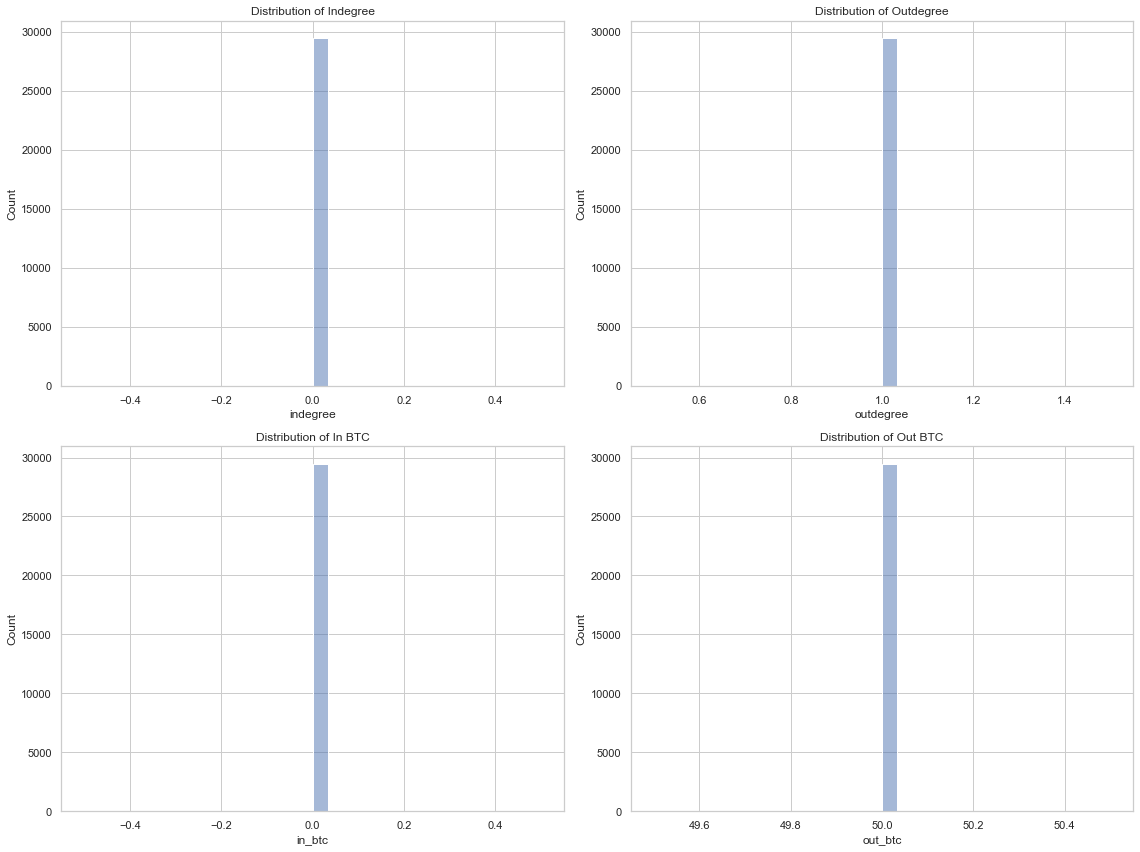

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualisation environment
sns.set(style="whitegrid")

# Distribution Analysis for selected features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plotting distributions
sns.histplot(cleaned_data['indegree'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Indegree')

sns.histplot(cleaned_data['outdegree'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Outdegree')

sns.histplot(cleaned_data['in_btc'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of In BTC')

sns.histplot(cleaned_data['out_btc'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Out BTC')

plt.tight_layout()
plt.show()

D:\ANACONDA\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\ANACONDA\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


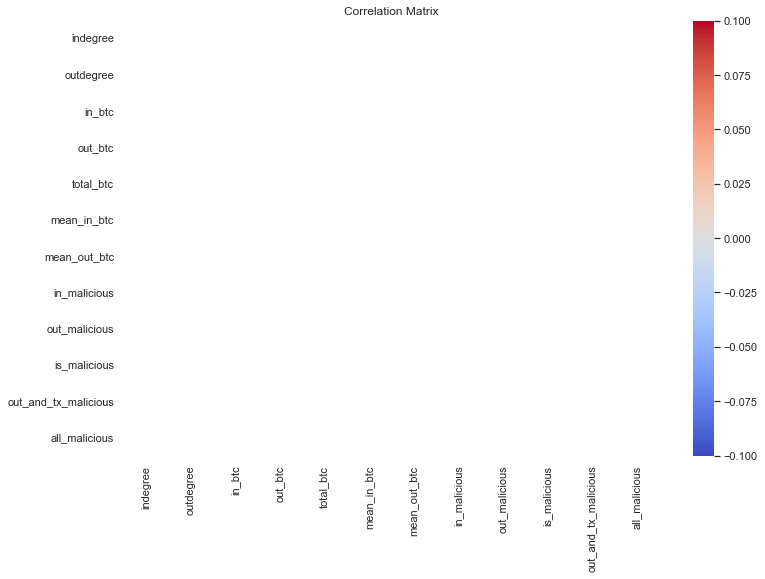

In [20]:
# Correlation analysis
correlation_matrix = cleaned_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()